# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


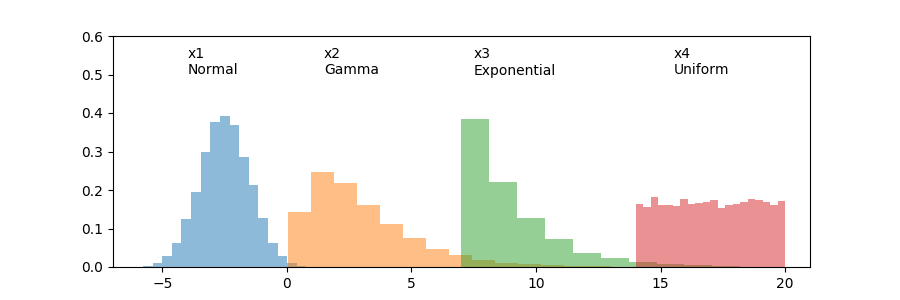

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

## Practice multiple plots

<IPython.core.display.Javascript object>


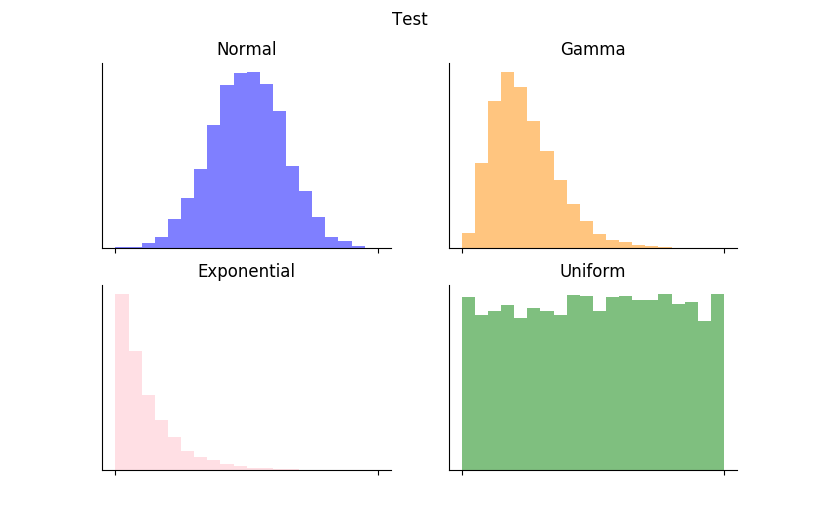

In [9]:
%matplotlib notebook

# creaset 2 x 2 suplots
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
plt.cla()

fig.suptitle('Test')

# set data
n=10000

x1 = np.random.normal(15, 4, n)
x2 = np.random.gamma(4, 2, n)
x3 = np.random.exponential(15, n)
x4 = np.random.uniform(0, 30 , n)

ax = [(ax1, 'Normal', x1), (ax2,'Gamma' , x2), (ax3,'Exponential', x3), (ax4,'Uniform', x4)]

# set bins
bins = 20
alpha = 0.5

ax1.hist(x1, bins=bins, color = 'blue', alpha=alpha, normed = True)
ax2.hist(x2, bins=bins, color = 'darkorange', alpha=alpha, normed = True)
ax3.hist(x3, bins=bins, color = 'pink', alpha=alpha, normed = True)
ax4.hist(x4, bins=bins, color = 'green', alpha=alpha, normed = True)

for i,j,k in ax:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.set_title(j)
    i.set_xticks([k.min(), k.max()])
    i.set_xticklabels([])
    i.set_yticks([])
    i.set_yticklabels([])

## Practice animation

<IPython.core.display.Javascript object>


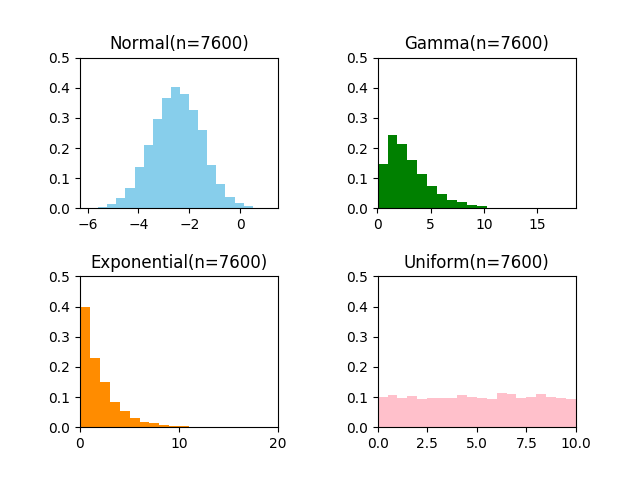

In [10]:
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec

n = 10000 # generate number of variables
step = 200

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)
x4 = np.random.uniform(0,10, 10000)

# set up the graph
fig = plt.figure()
gspec = gridspec.GridSpec(2,2)
gspec.update(hspace=0.45, wspace=0.5)

# define subplots
normal = plt.subplot(gspec[0,0])
gamma = plt.subplot(gspec[0,1])
exponential = plt.subplot(gspec[1,0])
uniform = plt.subplot(gspec[1,1])
hist = [normal, gamma, exponential, uniform]

setting = [('Normal', x1, normal, 'skyblue'), ('Gamma', x2, gamma, 'green'), 
           ('Exponential', x3, exponential, 'darkorange'), ('Uniform',x4, uniform, 'pink')]

def update_plot(i):
    if i == n: 
        a.event_source.stop() # control the stop of animation
    for title, x, hist, color in setting:
        hist.clear()
        hist.hist(x[:i], normed=True, bins=20,color = color) # provide the plot
        hist.axis([x.min(),x.max(),0,0.5]) # set axis
        hist.set_title(title + '(n={})'.format(i)) # set title
    
a = FuncAnimation(fig, update_plot, frames=np.arange(0, n+step, step), interval=100)